In [15]:
import torch as t
import torchvision.datasets as datasets 
import torchvision.transforms as transforms
import torch.nn as nn
import matplotlib.pyplot as plt
import time
from numpy import argmax


In [9]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.linear1 = nn.Linear(28*28, 100) 
        self.linear2 = nn.Linear(100, 50) 
        self.final = nn.Linear(50, 10)
        self.relu = nn.ReLU()

    def forward(self, img): #convert + flatten
        x = img.view(-1, 28*28)
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.final(x)
        return x


In [10]:
def TakesamplesfromNthBatch(loader,N,model):
    
    inputsout=[]
    labelsout=[]
    
    for i,data in enumerate(train_loader):
        inputs, labels = data
        inputsout=inputs.squeeze().numpy()
        labelsout=labels.numpy()   
        
           
        #inputsout.append(inputs.numpy())
        #labelsout.append(labels.numpy())    
        if i==N:
            prediction = model(inputs.view(-1, 784))
            predictionout = argmax(prediction.detach().numpy(),axis=1) 
            break

    return inputsout,labelsout,predictionout

In [11]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),])

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = t.utils.data.DataLoader(mnist_trainset, batch_size=10, shuffle=True)

mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = t.utils.data.DataLoader(mnist_testset, batch_size=10, shuffle=True)

In [12]:
model=Net()

cross_el = nn.CrossEntropyLoss()
optimizer = t.optim.Adam(model.parameters(), lr=0.001) #e-1
epoch = 10

for epoch in range(epoch):
    running_loss = 0.0
    start = time.time() #record run TIME
    
    for i,data in enumerate(train_loader):
        inputs, labels = data
        optimizer.zero_grad()
        output = model(inputs.view(-1, 28*28))
        loss = cross_el(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 500 == 499:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.5f' %
            (epoch + 1, i + 1, running_loss / 500))
            running_loss = 0.0
    end=time.time()
    print("for this epoch time passed:", end-start)
        
print('Finished Training')        

[1,   500] loss: 0.85992
[1,  1000] loss: 0.41673
[1,  1500] loss: 0.34938
[1,  2000] loss: 0.35256
[1,  2500] loss: 0.31467
[1,  3000] loss: 0.27026
[1,  3500] loss: 0.29834
[1,  4000] loss: 0.23951
[1,  4500] loss: 0.23269
[1,  5000] loss: 0.21046
[1,  5500] loss: 0.22365
[1,  6000] loss: 0.21121
for this epoch time passed: 17.866270780563354
[2,   500] loss: 0.20657
[2,  1000] loss: 0.17374
[2,  1500] loss: 0.18474
[2,  2000] loss: 0.17339
[2,  2500] loss: 0.18039
[2,  3000] loss: 0.18248
[2,  3500] loss: 0.18301
[2,  4000] loss: 0.14946
[2,  4500] loss: 0.15969
[2,  5000] loss: 0.16772
[2,  5500] loss: 0.16444
[2,  6000] loss: 0.15881
for this epoch time passed: 18.32301616668701
[3,   500] loss: 0.14392
[3,  1000] loss: 0.15231
[3,  1500] loss: 0.15181
[3,  2000] loss: 0.13223
[3,  2500] loss: 0.13555
[3,  3000] loss: 0.14819
[3,  3500] loss: 0.12279
[3,  4000] loss: 0.13133
[3,  4500] loss: 0.13020
[3,  5000] loss: 0.14151
[3,  5500] loss: 0.13248
[3,  6000] loss: 0.13996
for thi

In [13]:
correct =0
total=0

with t.no_grad():
    for data in test_loader:
        inputs, labels = data
        output = model(inputs.view(-1, 784))
        for idx, i in enumerate(output):
            if t.argmax(i) == labels[idx]:
                correct +=1
            total +=1
print(f'accuracy: {round(correct/total, 3)}')

accuracy: 0.964


True Label = 5 
True Label = 1 
True Label = 7 
True Label = 0 
True Label = 7 


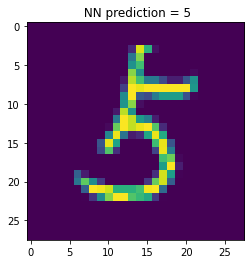

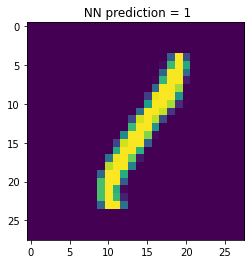

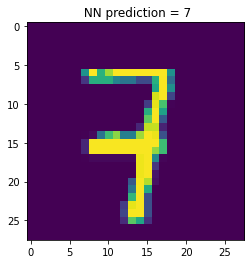

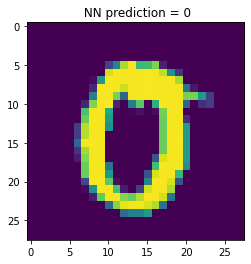

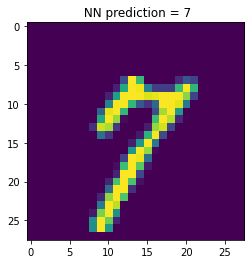

In [16]:
#Get some training or test data samples to visualize the predictions.

trial_input,trial_labels,trial_prediction = TakesamplesfromNthBatch(train_loader,1,model)


numberIntheBatch=0 # should be less than batch_size used in loader.
Nofexamples=5
for i in range(Nofexamples):    
    
    plt.figure()
    imgplot = plt.imshow(trial_input[numberIntheBatch])
    plt.title(' NN prediction = %i'  %trial_prediction[numberIntheBatch])
    print('True Label = %i ' %trial_labels[numberIntheBatch])
    # plt.set_xlabel('NN predicts it as = %i' %argmax(trial_prediction[numberIntheBatch]))
    numberIntheBatch=numberIntheBatch+1 # should be less than batch_size used in loader.



In [ ]:
PATH = './AllModelSave.pkl'
t.save(model, PATH)

modelloaded=t.load(PATH)